In [145]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, StackingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [79]:
# Read data file
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')
df_sample = pd.read_csv('dataset/sample.csv')

In [80]:
# View Data file
df_train.shape,df_test.shape

((18359, 14), (15021, 13))

In [81]:
df_train.dtypes # Data types

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [82]:
# more Data detail
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [83]:
# View Data
df_train.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [84]:
# Check the missing Data
df_train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [85]:
#Percentage of missing data in each column
(df_train.isna().sum() /df_train.shape[0]*100).sort_values()

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
relevent_experience        0.000000
training_hours             0.000000
target                     0.000000
experience                 0.321368
enrolled_university        1.862847
last_new_job               1.999020
education_level            2.489242
major_discipline          15.458358
gender                    22.321477
company_size              26.030830
company_type              27.447029
dtype: float64

In [86]:
# check  for duplicates
df_train.duplicated().sum()

0

In [87]:
# checking the target column
df_train.target.value_counts()

target
0    15934
1     2425
Name: count, dtype: int64

In [88]:
# checking the target column (preferable ['target']) and found it is aimbalance dataset
df_train['target'].value_counts(normalize =True)*100

target
0    86.79122
1    13.20878
Name: proportion, dtype: float64

In [89]:
# checking the target column
df_train.target.value_counts(normalize =True)*100

target
0    86.79122
1    13.20878
Name: proportion, dtype: float64

<Axes: xlabel='target'>

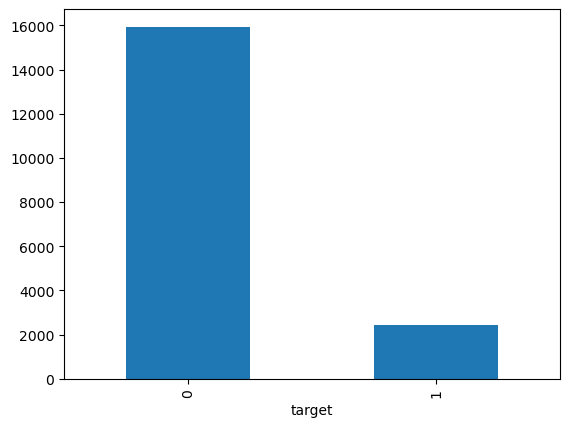

In [90]:
df_train.target.value_counts().plot(kind= 'bar')

In [91]:
target_col  =['target']
ignore_col  =['enrollee_id'] # Not much signification because it is a unique id

In [92]:
df_train.drop(columns = ignore_col).describe().T # init datatype only shows numerical data

,count,mean,std,min,25%,50%,75%,max
city_development_index,18359.0,0.847140,0.110189,0.448,0.796,0.91,0.92,0.949
training_hours,18359.0,65.899014,60.885300,1.000,23.000,47.00,89.00,336.000
target,18359.0,0.132088,0.338595,0.000,0.000,0.00,0.00,1.000


In [93]:
df_train.describe(include ='object')# include ='object' datatype   shows only on object data

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,18359,14261,18359,18017,17902,15521,18300,13580,13320,17992
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4358,12884,13596,13659,10769,13738,3437,3120,10051,7567


In [94]:
# View Unique
df_train.nunique()

enrollee_id               18359
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [95]:
for col in df_train.drop(columns = ignore_col).columns :
    print(col,df_train[col].nunique(), '==>', df_train[col].unique())

city 123 ==> ['city_149' 'city_83' 'city_16' 'city_64' 'city_100' 'city_21' 'city_114'
 'city_103' 'city_97' 'city_160' 'city_65' 'city_90' 'city_75' 'city_136'
 'city_159' 'city_67' 'city_28' 'city_10' 'city_73' 'city_76' 'city_104'
 'city_27' 'city_30' 'city_61' 'city_99' 'city_41' 'city_142' 'city_9'
 'city_116' 'city_128' 'city_74' 'city_69' 'city_1' 'city_176' 'city_40'
 'city_123' 'city_152' 'city_165' 'city_89' 'city_36' 'city_44' 'city_46'
 'city_45' 'city_134' 'city_93' 'city_180' 'city_162' 'city_84' 'city_138'
 'city_173' 'city_19' 'city_71' 'city_158' 'city_23' 'city_102' 'city_105'
 'city_91' 'city_11' 'city_13' 'city_57' 'city_20' 'city_14' 'city_37'
 'city_115' 'city_50' 'city_167' 'city_12' 'city_143' 'city_126' 'city_77'
 'city_101' 'city_150' 'city_179' 'city_107' 'city_175' 'city_146'
 'city_98' 'city_166' 'city_118' 'city_129' 'city_127' 'city_24' 'city_81'
 'city_26' 'city_139' 'city_94' 'city_70' 'city_145' 'city_157' 'city_111'
 'city_78' 'city_80' 'city_33' 'cit

<Axes: xlabel='training_hours', ylabel='Density'>

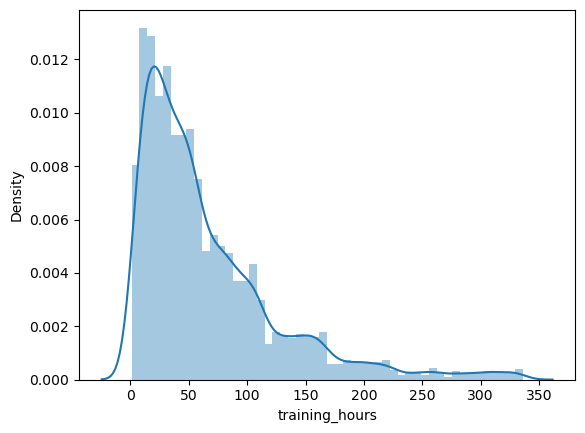

In [96]:
sns.distplot(df_train.training_hours)

Most of them have 50hours of training
150 + hours of trainng are low in count


<Axes: xlabel='city_development_index', ylabel='Density'>

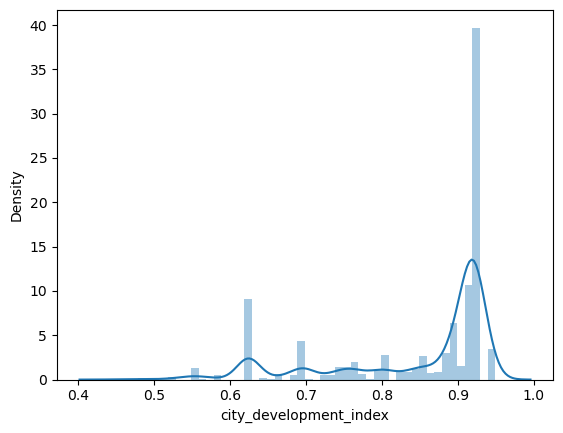

In [97]:
sns.distplot(df_train.city_development_index)

In [98]:
# Most of the students are from city development index 0.9

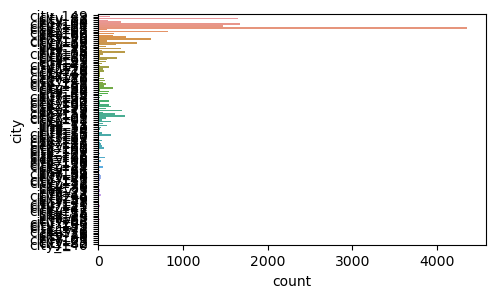

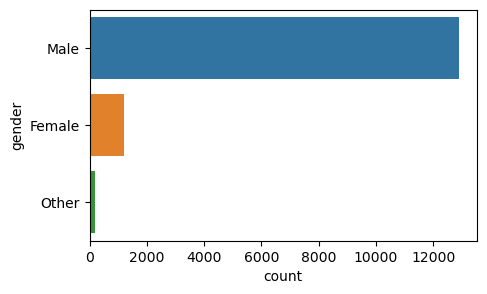

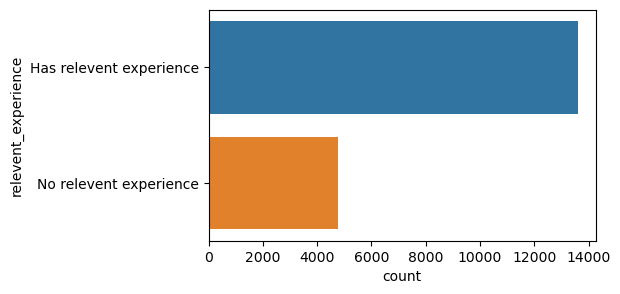

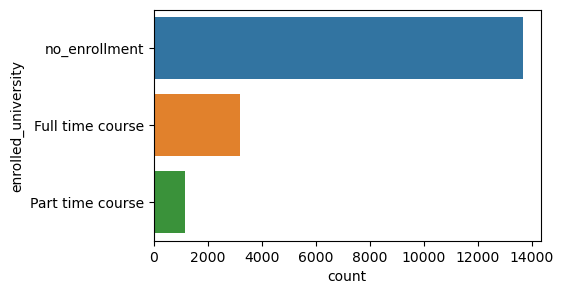

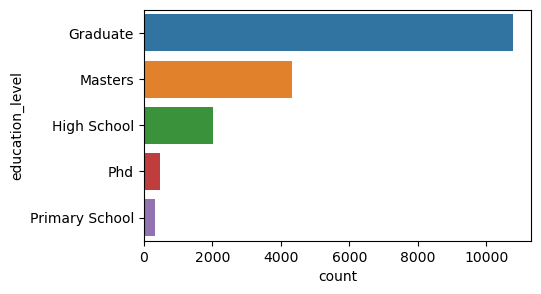

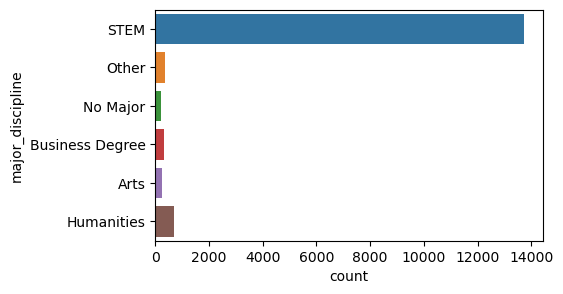

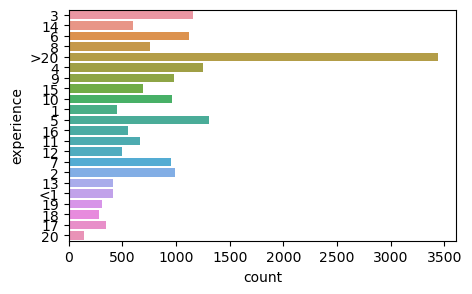

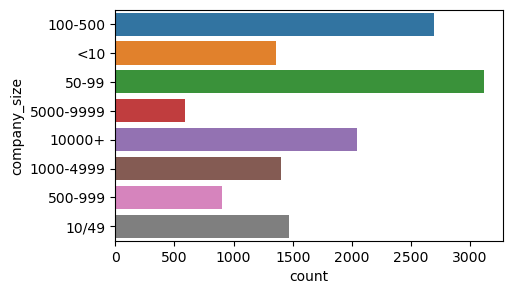

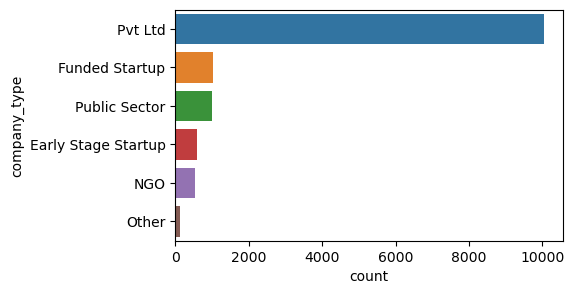

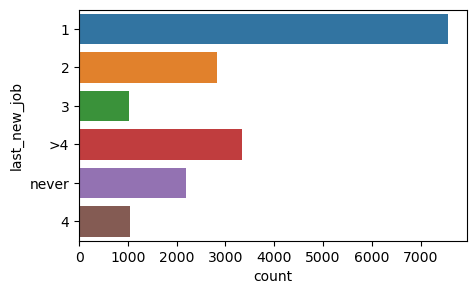

In [99]:
for col in df_train.select_dtypes(include ='object').columns :
    plt.figure(figsize=(5,3))
    sns.countplot(y=df_train[col])
    plt.show()

Most have not Enrolled to any university
50% are graduates
80% belong to the STEM Group

around 25% are with 20+ years of expereince
around 50% working in a Private Organization

<Axes: xlabel='experience,target'>

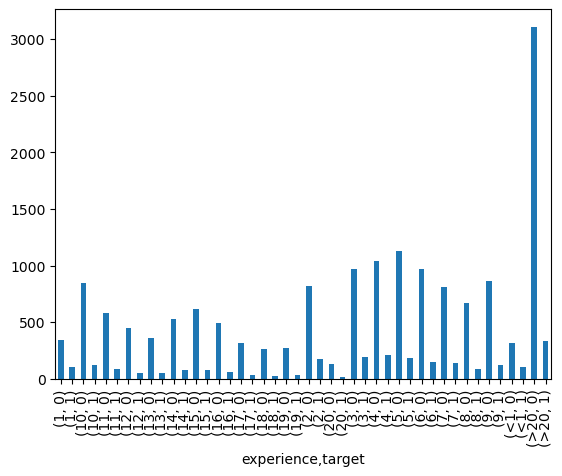

In [100]:
df_train[['experience','target']].groupby('experience').value_counts().plot(kind='bar')

In [101]:
exp_tgt = df_train[['experience','target']].groupby('experience').value_counts().unstack() # unstacjk changes to a data frame
exp_tgt['%'] = exp_tgt[1]*100/(exp_tgt[0]+exp_tgt[1])
exp_tgt.sort_values(exp_tgt.columns[2],ascending =False).head(5)

target,0,1,%
experience,,,
<1,315,101,24.278846
1,344,108,23.893805
2,821,171,17.237903
4,1039,211,16.880000
3,968,191,16.479724


In [102]:
# People with less experience are looking for a job change mostly

Using Pipeline

Address Missing Data
Encoding on category columns
Standardize
Treat Imbalance

In [103]:
df_train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [104]:
cat_columns = ['city','gender','relevent_experience','enrolled_university','education_level',
               'major_discipline','experience','company_size','company_type','last_new_job'
              ]
num_columns = ['city_development_index','training_hours']

In [105]:
print(target_col,ignore_col,cat_columns,num_columns,sep ='\n')

['target']
['enrollee_id']
['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
['city_development_index', 'training_hours']


In [106]:
cat_pipe_encode = Pipeline (
    steps = [
        ('impute_cat' , SimpleImputer(strategy ='most_frequent')) ,#missed values
         ('ohe' ,OneHotEncoder(handle_unknown ='ignore')) #category encoding
])
 

In [107]:
num_pipe_encode = Pipeline(
    steps = [
        ('impute_num' , SimpleImputer(strategy ='median')) , #missed values
         ('scale' , StandardScaler())  #standard scaler
    ]
)

In [108]:
preprocess = ColumnTransformer (
    transformers = [
         ('cat_encode' , cat_pipe_encode,cat_columns) , 
         ('nm_encode' , num_pipe_encode, num_columns)
])

In [109]:
model_pipeline = Pipeline(
steps = [
     ('preprocess', preprocess),
     ('model',LogisticRegression())
]
    
)

In [110]:
X = df_train.drop(columns=ignore_col+target_col)
X.head(2)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106
1,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69


In [111]:
y = df_train[target_col]
y.head(2)

,target
0,0
1,0


In [112]:
train_X, val_X, train_y, val_y = train_test_split(X,y, 
                                         random_state=42, test_size=0.1)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((16523, 12), (1836, 12), (16523, 1), (1836, 1))

In [113]:
model_pipeline.fit (train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city', 'gender',
                                                   'relevent_experience',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'experience', 'company_size',
                                                   'company_type',
                                                   'last_new_job']),
                                                 ('nm_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['city_development_index',
                                                   'training_hours'])])),
                ('model', LogisticRegression())])

In [114]:
predicted_train_tgt = model_pipeline.predict(train_X)

In [115]:
predicted_val_tgt = model_pipeline.predict(val_X)

In [116]:
def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Train cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')
    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Train cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')    

    y_pred_proba = model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()

    fpr, tpr, thrsh  = roc_curve(val_y,y_pred_proba)
    plt.plot(fpr, tpr)
    plt.show()

Train cnf_matrix
[[14347     2]
 [ 2165     9]]
Train cnf_matrix
[[1585    0]
 [ 250    1]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     14349
           1       0.82      0.00      0.01      2174

    accuracy                           0.87     16523
   macro avg       0.84      0.50      0.47     16523
weighted avg       0.86      0.87      0.81     16523

Train cls rep
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1585
           1       1.00      0.00      0.01       251

    accuracy                           0.86      1836
   macro avg       0.93      0.50      0.47      1836
weighted avg       0.88      0.86      0.80      1836



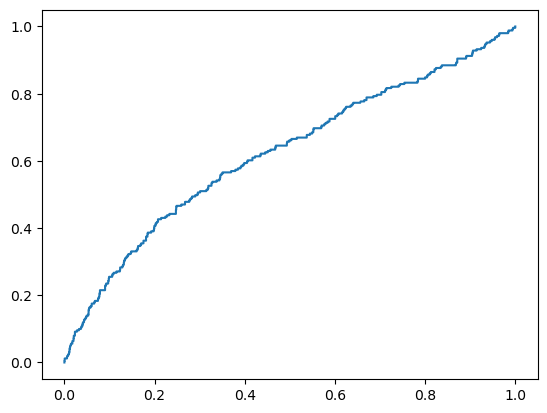

In [117]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [118]:
params = [

    {

    'model': [LogisticRegression()],

    'model__penalty':['l2',None],

    'model__C':[0.5,3]

    }    

]

In [119]:
grid = GridSearchCV(estimator=model_pipeline, param_grid=params, cv=2, scoring='roc_auc')

In [120]:
grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['city',
                                                                          'gender',
                                                                          'relevent_experience',
                                                                          'enrolled_university',
                                                                          'education_level',
                                                                          'major_discipline',
                                                                          'experience',
                                                                          'company_size',
                                                                          'company_type',
                                                                          'last_new_job']),
                                                                        ('nm_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['city_development_index',
                                                                          'training_hours'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression(C=0.5)],
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [121]:
grid.best_params_

{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}

In [122]:
grid.cv_results_

{'mean_fit_time': array([0.51490819, 1.75765967, 1.32507038, 0.88958168]),
 'std_fit_time': array([0.00511086, 0.75747204, 0.09486651, 0.02949452]),
 'mean_score_time': array([0.14522302, 0.42971504, 0.37732148, 0.18399441]),
 'std_score_time': array([0.0049032 , 0.05524242, 0.18752289, 0.02409613]),
 'param_model': masked_array(data=[LogisticRegression(C=0.5), LogisticRegression(C=0.5),
                    LogisticRegression(C=0.5), LogisticRegression(C=0.5)],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__C': masked_array(data=[0.5, 0.5, 3, 3],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__penalty': masked_array(data=['l2', None, 'l2', None],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model': LogisticRegression(C=0.5),
   'model__C': 0.5,
   'model__penalty': 'l2'},
  {'model'

In [123]:
res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}",0.631173,1
1,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': None}",0.617961,3
2,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': 'l2'}",0.623176,2
3,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': None}",0.617961,3


In [124]:
###10/11/2024

df_train.columns.difference(df_test.columns)

# updating the existing target values with predicted values

df_sample['target'] = model_pipeline.predict(df_test)

df_sample.to_csv('sub_1.csv',index=False) 

In [125]:
import joblib
joblib.dump(model_pipeline,  'jobchg_pipeline_model.pkl')

['jobchg_pipeline_model.pkl']

In [126]:
# Sampling
from imblearn.over_sampling import RandomOverSampler

In [127]:
#!pip install imlearn

In [128]:
train_y.value_counts()

target
0         14349
1          2174
Name: count, dtype: int64

In [129]:
# making a balanced data set
over_sampling = RandomOverSampler()
train_X_os, train_y_os = over_sampling.fit_resample(train_X, train_y)

In [130]:
train_y_os.value_counts()

target
0         14349
1         14349
Name: count, dtype: int64

In [131]:
params_2 = [

    {

    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]

    }   , 

    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth' :  [3,5],
   
    }

]

In [132]:
grid_2 = GridSearchCV(estimator=model_pipeline,
                      param_grid=params_2, cv=2, scoring='roc_auc')

In [133]:
grid_2.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['city',
                                                                          'gender',
                                                                          'relevent_experience',
                                                                          'enrolled_university',
                                                                          'education_level',
                                                                          'major_discipline',
                                                                          'experience',
                                                                          'company_size',...
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['city_development_index',
                                                                          'training_hours'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression(C=0.5)],
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [134]:
grid_2.best_params_

{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}

In [135]:
grid_2.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city', 'gender',
                                                   'relevent_experience',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'experience', 'company_size',
                                                   'company_type',
                                                   'last_new_job']),
                                                 ('nm_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['city_development_index',
                                                   'training_hours'])])),
                ('model', LogisticRegression(C=0.5))])

Train cnf_matrix
[[14347     2]
 [ 2165     9]]
Train cnf_matrix
[[1585    0]
 [ 250    1]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     14349
           1       0.82      0.00      0.01      2174

    accuracy                           0.87     16523
   macro avg       0.84      0.50      0.47     16523
weighted avg       0.86      0.87      0.81     16523

Train cls rep
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1585
           1       1.00      0.00      0.01       251

    accuracy                           0.86      1836
   macro avg       0.93      0.50      0.47      1836
weighted avg       0.88      0.86      0.80      1836



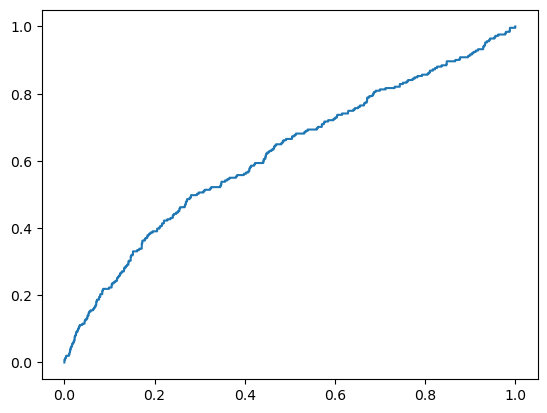

In [136]:
new_model = grid_2.best_estimator_
model_train_val_eval(train_X,val_X,train_y,val_y,new_model)

In [138]:
#res_df_2  = pd.DataFrame(grid_2.cv_results_,)
#pd.set_option('display.max_colwidth',100)
#res_df[['params','mean_test_score','rank_test_score']]

res_df_2 = pd.DataFrame(grid_2.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_2[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}",0.662126,1
1,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': None}",0.661216,3
2,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': 'l2'}",0.661665,2
3,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': None}",0.661216,3
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.619943,6
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.640367,5


In [139]:
# updating the existing target values with predicted values

df_sample['target'] = model_pipeline.predict(df_test)
df_sample.to_csv('sub_2.csv',index=False) 

In [146]:
params_3 = [

    {

    'model': [LogisticRegression()],

    'model__penalty':['l2',None],

    'model__C':[0.5,3]

    },

    {

    'model': [DecisionTreeClassifier()],

    'model__max_depth':[3,5]

    },

    {

    'model': [StackingClassifier(

    estimators=[

        ['sclf1',RandomForestClassifier()],

        ['sclf2',GradientBoostingClassifier()],

        ['sclf3',AdaBoostClassifier()],],   

        final_estimator=LogisticRegression()

 

    )],

    'model__sclf1__max_depth':[4,8],

    'model__sclf2__n_estimators':[15,25],    

    'model__sclf3__n_estimators':[5,35],    

    }

 

]

In [147]:
grid_3 = GridSearchCV(estimator=model_pipeline,
                      param_grid=params_3, cv=2, scoring='roc_auc')

In [149]:
grid_3.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['city',
                                                                          'gender',
                                                                          'relevent_experience',
                                                                          'enrolled_university',
                                                                          'education_level',
                                                                          'major_discipline',
                                                                          'experience',
                                                                          'company_size',...
                         {'model': [StackingClassifier(estimators=[['sclf1',
                                                                    RandomForestClassifier(max_depth=8)],
                                                                   ['sclf2',
                                                                    GradientBoostingClassifier(n_estimators=15)],
                                                                   ['sclf3',
                                                                    AdaBoostClassifier(n_estimators=5)]],
                                                       final_estimator=LogisticRegression())],
                          'model__sclf1__max_depth': [4, 8],
                          'model__sclf2__n_estimators': [15, 25],
                          'model__sclf3__n_estimators': [5, 35]}],
             scoring='roc_auc')

In [151]:
grid_3.best_params_

{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)],
                                ['sclf2',
                                 GradientBoostingClassifier(n_estimators=15)],
                                ['sclf3', AdaBoostClassifier(n_estimators=5)]],
                    final_estimator=LogisticRegression()),
 'model__sclf1__max_depth': 8,
 'model__sclf2__n_estimators': 15,
 'model__sclf3__n_estimators': 5}

In [152]:
grid_3.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city', 'gender',
                                                   'relevent_experience',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'experience', 'company_size',
                                                   'company_type',
                                                   'last_new_job...
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['city_development_index',
                                                   'training_hours'])])),
                ('model',
                 StackingClassifier(estimators=[['sclf1',
                                                 RandomForestClassifier(max_depth=8)],
                                                ['sclf2',
                                                 GradientBoostingClassifier(n_estimators=15)],
                                                ['sclf3',
                                                 AdaBoostClassifier(n_estimators=5)]],
                                    final_estimator=LogisticRegression()))])

In [153]:
res_df_3 = pd.DataFrame(grid_3.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_3[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.662126,8
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.661216,10
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.661665,9
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.661216,10
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.619943,14
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.639883,13
6,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ...",0.662609,7
7,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ...",0.660913,12
8,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ...",0.669337,5
9,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ...",0.668632,6


In [154]:
# updating the existing target values with predicted values

df_sample['target'] = model_pipeline.predict(df_test)
df_sample.to_csv('sub_3.csv',index=False)

In [155]:
joblib.dump(model_pipeline,  'jobchg_pipeline_model_01.pkl')

['jobchg_pipeline_model_01.pkl']